# Example of adding multiple scene objects of different number of modules per row

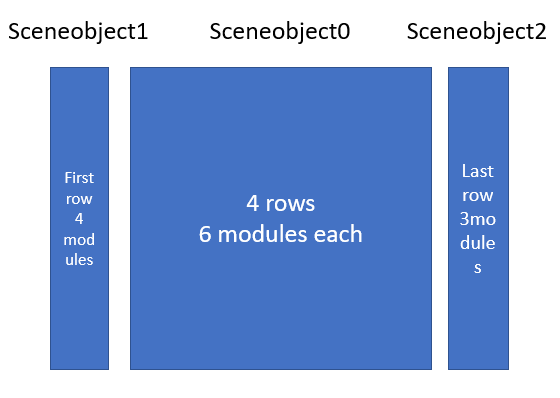

In [1]:
import os
import numpy as np
import pandas as pd
from pathlib import Path

testfolder = str(Path().resolve().parent.parent / 'bifacial_radiance' / 'TEMP' / 'Sabin')
if not os.path.exists(testfolder):
    os.makedirs(testfolder)
    
print ("Your simulation will be stored in %s" % testfolder)
    
from bifacial_radiance import RadianceObj, AnalysisObj    

Your simulation will be stored in C:\Users\sayala\Documents\GitHub\bifacial_radiance\bifacial_radiance\TEMP\Sabin


In [3]:
# Import the lib

import bifacial_radiance
import os
from pathlib import Path
import numpy as np
import pandas as pd

# inputs
name='Testrun_UD_2'

# Location 

la = 40.0583  # NJ
lo = -74.4057  # NJ

# MakeModule Parameters

moduletype='test-module'
numpanels = 1 # [ numbers of panels per unit ]
x = 0.95 # lenght of one panel 
y = 1.95 # width of one panel

# SceneDict Parameters
pitch = 3 # m
albedo = 0.2

yrs = 2021 # The year needed
hrs = 2990 # particular hours of the year

hub_height = 4.3 # m
nMods = 6 # six modules per row.  # This Changes based on optimization
nRows = 4  # 3 row lenght of the list     # This Changes based on optimization

azimuth_ang=180 # Facing south
tilt =35 # tilt.


# Project Intro
# demo = Project


Project = RadianceObj(name, testfolder)
Project.setGround(albedo)
epwfile = Project.getEPW(la,lo) # NJ lat/lon 40.0583° N, 74.4057
metdata = Project.readWeatherFile(epwfile,coerce_year=yrs )
Project.gendaylit(hrs)

# Making module with all the variables

module=Project.makeModule(name=moduletype,x=x,y=y,numpanels=numpanels)



path = C:\Users\sayala\Documents\GitHub\bifacial_radiance\bifacial_radiance\TEMP\Sabin
Loading albedo, 1 value(s), 0.200 avg
1 nonzero albedo values.
Getting weather file: USA_NJ_McGuire.AFB.724096_TMY3.epw
 ... OK!
8760 line in WeatherFile. Assuming this is a standard hourly WeatherFile for the year for purposes of saving Gencumulativesky temporary weather files in EPW folder.
Coercing year to 2021
Saving file EPWs\metdata_temp.csv, # points: 8760
Calculating Sun position for Metdata that is right-labeled  with a delta of -30 mins. i.e. 12 is 11:30 sunpos

Module Name: test-module
Module test-module updated in module.json
Pre-existing .rad file objects\test-module.rad will be overwritten



In [4]:
# create a scene with all the variables

sceneDict = {'tilt':tilt,'pitch':pitch,'hub_height':hub_height,'azimuth':azimuth_ang, 'nMods': nMods, 'nRows': nRows,
            'appendRadfile':True} # 'originx': 0, 'originy': }
scene = Project.makeScene(module=moduletype, sceneDict=sceneDict)


In [6]:
octfile = Project.makeOct(Project.getfilelist())

Created Testrun_UD_2.oct


In [8]:
sceneDict = {'tilt':tilt,'pitch':pitch,'hub_height':hub_height+ 0.3,'azimuth':azimuth_ang, 'nMods': 1, 'nRows': 1,
            'appendRadfile':True} # 'originx': 0, 'originy': }
scene = Project.makeScene(module=moduletype, sceneDict=sceneDict)


In [9]:
octfile = Project.makeOct(Project.getfilelist())

Created Testrun_UD_2.oct


In [10]:
!rvu -vf views\front.vp -e .01 -pe 0.3 -vp 1 -7.5 12 Testrun_UD_2.oct

In [5]:
#!rvu -vf views\front.vp -e .01 -pe 0.3 -vp 1 -7.5 12 Testrun_UD_2.oct

In [ ]:
#First row: Azimuth 180 facing south
originxfirst = 0
originyfirst = -(np.floor(nRows/2.0)+1)*pitch

#First row: Azimuth 180 facing south
originxlast = 0
originylast = (np.floor(nRows/2.0)+1)*pitch


In [ ]:
# Check if center array number is even, the distance will have to be different for first vs last 
# row based on the rounding (one rounds up one rounds down)
if nRows%2 == 0: # if even
    distancelast = (nRows/2.0)+1)*pitch
    distancefirst = (nRows/2.0)*pitch
    
    originxlast = np.round(np.sin(np.radians(azimuth_ang)),3)*distancelast  # should be 0 for 180
    originylast = np.round(np.cos(np.radians(azimuth_ang)),3)*distancelast  # should be 6 for 180

    originxfirst = np.round(np.sin(np.radians(azimuth_ang)),3)*distancefirst # should be 0 for 180
    originyfirst = -1*np.round(np.cos(np.radians(azimuth_ang)),3)*distancefirst # should be -6 for 180
    
else: # if odd

    distance = (np.floor(nRows/2.0)+1)*pitch

    originxlast = np.round(np.sin(np.radians(azimuth_ang)),3)*distance  # should be 0 for 180
    originylast = np.round(np.cos(np.radians(azimuth_ang)),3)*distance  # should be 6 for 180

    originxfirst = np.round(np.sin(np.radians(azimuth_ang)),3)*distance # should be 0 for 180
    originyfirst = -1*np.round(np.cos(np.radians(azimuth_ang)),3)*distance # should be -6 for 180

In [ ]:
nModsFirstRow = 4
nModsLastRow = 3

In [ ]:
# create a scene with all the variables
sceneDictFirst = {'tilt':tilt,'pitch':0.000001,'hub_height':hub_height,'azimuth':azimuth_ang, 'nMods': nModsFirstRow, 
                  'nRows': 1,  'originx': originxfirst, 'originy': originyfirst, 'appendRadfile':True}
sceneFirst = Project.makeScene(module=moduletype, sceneDict=sceneDictFirst)
#octfile = Project.makeOct(Project.getfilelist())

In [ ]:
# create a scene with all the variables
sceneDictLast = {'tilt':tilt,'pitch':0.000001,'hub_height':hub_height,'azimuth':azimuth_ang, 'nMods': nModsLastRow, 
                  'nRows': 1, 'originx': originxlast, 'originy': originylast, 'appendRadfile':True }
sceneLast = Project.makeScene(module=moduletype, sceneDict=sceneDictLast)
octfile = Project.makeOct(Project.getfilelist())

In [ ]:
#!rvu -vf views\front.vp -e .01 -pe 0.3 -vp 1 -15.5 25 Testrun_UD_2.oct

In [ ]:
# Add scene objects in a loop example
# To do analysis on each object you add htis way, call it like sceneDictLast[0] in the analysis.moduleAnalysis function
# i.e. frontscan, backscan = analysis.moduleAnalysis(sceneDictLast[0], sensorsy=3, sensorsx=3, modWanted=1, rowWanted=1)

sceneArray = []
for rowobject in range(0, 4):
    # Right now I am not changing any parameters so it is just re-appending the same object multiple times.
    sceneDictLast = {'tilt':tilt,'pitch':0.000001,'hub_height':hub_height,'azimuth':azimuth_ang, 'nMods': nModsLastRow, 
                      'nRows': 1, 'originx': originxlast, 'originy': originylast, 'appendRadfile':True }
    sceneArray.append(Project.makeScene(module=moduletype, sceneDict=sceneDictLast))
octfile = Project.makeOct(Project.getfilelist())

In [ ]:
analysis = AnalysisObj(octfile)
frontscan, backscan = analysis.moduleAnalysis(scene, sensorsy=3, sensorsx=3, modWanted=1, rowWanted=1)
analysis.analysis(octfile, "Main", frontscan, backscan) 

In [ ]:
analysis = AnalysisObj(octfile)
frontscan, backscan = analysis.moduleAnalysis(sceneFirst, sensorsy=3, sensorsx=3, modWanted=1, rowWanted=1)
analysis.analysis(octfile, "First", frontscan, backscan) 


In [ ]:
sceneobjectslist = [sceneFirst, scene, sceneLast]
modulesperscene = [4, 6, 3]
rowsperscene = [1, 4, 1]
resultsname = ['First', 'Main', 'Last']

for ii in range(0, len(sceneobjectlist)):
    sceneobject = sceneobjectlist[ii]
    for rowWanted in range(0, rowsperscene[ii]):
        for modWanted in range(0, modulesperscene[ii]):
            frontscan, backscan = analysis.moduleAnalysis(sceneobject, sensorsy=9, sensorsx=1, modWanted=modWnated, rowWanted=rowWanted)
            analysis.analysis(octfile, resultsname+'_', frontscan, backscan) 


In [ ]:
# P = n E A 

In [ ]:
calculatePerformance()